# Proyek Sains Pulse: [Dataset Pelatihan.csv]
- **Nama:** [Urwah Hasan]
- **Email:** [hasanhizbullah18@gmail.com]
- **ID Dicoding:** [Hasan Hizbullah]

(Dataset Pelatihan.csv) "berasal dari kaggle"

## Research Question

**1. Pemetaan cepat (scoring dan klasifikasi):**
- Bagaiman memetakan performa numerasi dan literasi sains siswa secara cepat dengan mengelompokkan nila berdasarkan hasil ujian, dan perubahan performa ujian per Mapel.

**2. Insight utama dari nilai:**
- Bagaimana pola distribusi Nilai/UTS/UAS pada tiap Matkul, dan Matkul mana yang konsisten paling rendah
atau paling tinggi?.

**3. Faktor yang berkaitan dengan nilai rendah:**
- Seberapa besar perbedaan performa (Nilai/UTS/UAS) antar Matkul, Gender dan umur serta faktor mana yang paling kuat berkaitan dengan nilai rendah?.

**4. Identifikasi siswa butuh intervensi (yang bisa dioperasionalkan):**
- Berapa proporsi siswa yang terindikasi membutuhkan intervensi pembelajaran berdasarkan aturan resiko (mis. Nilai < KKM atau UAS < UTS), dan siapa saja (berdasarkan ID) pada tiap Matkul?.

**5. Tren performa dari waktu ke waktu**
- Bagaiman tren rata-rata Nilai/UTS/UAS dari waktu ke waktu (berdasarkan tanggal), dan apakah tren tersebut berbeda antar Matkul (Matematika vs Sains/IPA)?

## Import Library

In [2]:
!pip install streamlit -q
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.8 MB/s eta 0:00:00


In [3]:
#Cleaning, Dashboard Streamlit, EDA
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import plotly.express as px

warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv('Dataset Pelatihan.csv')
df.head()

,ID,Nama,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS
0,1.0,Budi,24.0,Laki-laki,85.0,Kimia,9/8/2023,90.0,80.0
1,2.0,Ani,21.0,Perempuan,77.5,Matematika,15/8/2023,75.0,80.0
2,3.0,Joko,20.0,Laki-laki,90.0,Biologi,15/8/2023,85.0,95.0
3,4.0,Siti,21.0,Perempuan,60.0,Matematika,9/8/2023,55.0,65.0
4,5.0,Agus,23.0,Laki-laki,77.5,Fisika,9/8/2023,80.0,75.0


**Insight:**
- Dataset terdapat informasi ID,	Nama,	Umur,	Gender, Nilai, Matkul,	Tanggal,	UTS,	UAS.
- Pada kolom bagian nama perlu dihilangkan karena yang akan digunakan adalah ID (juga untuk menjaga privasi).

### Assessing Data

In [5]:
pd.read_csv('Dataset Pelatihan.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       100 non-null    float64
 1   Nama     100 non-null    object 
 2   Umur     100 non-null    float64
 3   Gender   100 non-null    object 
 4   Nilai    100 non-null    float64
 5   Matkul   100 non-null    object 
 6   Tanggal  100 non-null    object 
 7   UTS      100 non-null    float64
 8   UAS      100 non-null    float64
dtypes: float64(5), object(4)
memory usage: 7.9+ KB


In [6]:
df.columns.tolist()

['ID', 'Nama', 'Umur', 'Gender', 'Nilai', 'Matkul', 'Tanggal', 'UTS', 'UAS']

In [7]:
duplicates_columns = df.duplicated().sum()
duplicates_columns

np.int64(9)

In [8]:
df[df.duplicated(keep=False)].head(20)

,ID,Nama,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- Terdapat duplikasi pada kolom kosong yang perlu dibersihkan.
- List columns sudah rapi.

### Cleaning Data

In [9]:
# Membersihkan kolom kosonh dan duplikasi pada dataset
df = df.dropna(how="all")
df = df.drop_duplicates()
df[df.duplicated(keep=False)].head(20)

,ID,Nama,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS


In [10]:
# Tidak memasukan list kategori (Nama)
df = df.drop(columns=['Nama'])
df.head()

,ID,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS
0,1.0,24.0,Laki-laki,85.0,Kimia,9/8/2023,90.0,80.0
1,2.0,21.0,Perempuan,77.5,Matematika,15/8/2023,75.0,80.0
2,3.0,20.0,Laki-laki,90.0,Biologi,15/8/2023,85.0,95.0
3,4.0,21.0,Perempuan,60.0,Matematika,9/8/2023,55.0,65.0
4,5.0,23.0,Laki-laki,77.5,Fisika,9/8/2023,80.0,75.0


In [11]:
# memperbaiki list kategorti (Tanggal) agar bisa digunakan untuk tren waktu dan filter tanggal
df["Tanggal"] = pd.to_datetime(df["Tanggal"], errors="coerce", dayfirst=True)
df = df.dropna(subset=["Tanggal"])
df.head()

,ID,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS
0,1.0,24.0,Laki-laki,85.0,Kimia,2023-08-09,90.0,80.0
1,2.0,21.0,Perempuan,77.5,Matematika,2023-08-15,75.0,80.0
2,3.0,20.0,Laki-laki,90.0,Biologi,2023-08-15,85.0,95.0
3,4.0,21.0,Perempuan,60.0,Matematika,2023-08-09,55.0,65.0
4,5.0,23.0,Laki-laki,77.5,Fisika,2023-08-09,80.0,75.0


In [12]:
# Membuat fitur analsis dan intervensi
df["Delta Performa"] = df["UAS"] - df["UTS"]

# Performa Kategori
def kategori(Nilai):
  if Nilai < 60:
    return "intervensi"
  elif Nilai < 80:
    return "cukup"
  else:
    return "bagus"

df["Performa"] = df["Nilai"].apply(kategori)
df.head(100)

,ID,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS,Delta Performa,Performa
0,1.0,24.0,Laki-laki,85.0,Kimia,2023-08-09,90.0,80.0,-10.0,bagus
1,2.0,21.0,Perempuan,77.5,Matematika,2023-08-15,75.0,80.0,5.0,cukup
2,3.0,20.0,Laki-laki,90.0,Biologi,2023-08-15,85.0,95.0,10.0,bagus
3,4.0,21.0,Perempuan,60.0,Matematika,2023-08-09,55.0,65.0,10.0,cukup
4,5.0,23.0,Laki-laki,77.5,Fisika,2023-08-09,80.0,75.0,-5.0,cukup
...,...,...,...,...,...,...,...,...,...,...
95,96.0,24.0,Laki-laki,81.0,Fisika,2023-08-15,76.0,86.0,10.0,bagus
96,97.0,22.0,Perempuan,82.0,Kimia,2023-08-15,92.0,72.0,-20.0,bagus
97,98.0,22.0,Laki-laki,80.5,Matematika,2023-08-15,87.0,74.0,-13.0,bagus
98,99.0,22.0,Perempuan,72.0,Biologi,2023-08-15,74.0,70.0,-4.0,cukup


In [13]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"], errors="coerce", dayfirst=True)

df['ID'] =df['ID'].astype(int)
df['Umur'] =df['Umur'].astype(int)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              100 non-null    int64         
 1   Umur            100 non-null    int64         
 2   Gender          100 non-null    object        
 3   Nilai           100 non-null    float64       
 4   Matkul          100 non-null    object        
 5   Tanggal         100 non-null    datetime64[ns]
 6   UTS             100 non-null    float64       
 7   UAS             100 non-null    float64       
 8   Delta Performa  100 non-null    float64       
 9   Performa        100 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 8.6+ KB


,ID,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS,Delta Performa,Performa
0,1,24,Laki-laki,85.0,Kimia,2023-08-09,90.0,80.0,-10.0,bagus
1,2,21,Perempuan,77.5,Matematika,2023-08-15,75.0,80.0,5.0,cukup
2,3,20,Laki-laki,90.0,Biologi,2023-08-15,85.0,95.0,10.0,bagus
3,4,21,Perempuan,60.0,Matematika,2023-08-09,55.0,65.0,10.0,cukup
4,5,23,Laki-laki,77.5,Fisika,2023-08-09,80.0,75.0,-5.0,cukup


**Insight:**
- Data sudah dibersihkan dan dirapikan
- Data siap diproses

In [14]:
df.to_csv('data_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
pd.read_csv('data_clean.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              100 non-null    int64  
 1   Umur            100 non-null    int64  
 2   Gender          100 non-null    object 
 3   Nilai           100 non-null    float64
 4   Matkul          100 non-null    object 
 5   Tanggal         100 non-null    object 
 6   UTS             100 non-null    float64
 7   UAS             100 non-null    float64
 8   Delta Performa  100 non-null    float64
 9   Performa        100 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 7.9+ KB


In [16]:
df = pd.read_csv('data_clean.csv')
df["Tanggal"] = pd.to_datetime(df["Tanggal"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              100 non-null    int64         
 1   Umur            100 non-null    int64         
 2   Gender          100 non-null    object        
 3   Nilai           100 non-null    float64       
 4   Matkul          100 non-null    object        
 5   Tanggal         100 non-null    datetime64[ns]
 6   UTS             100 non-null    float64       
 7   UAS             100 non-null    float64       
 8   Delta Performa  100 non-null    float64       
 9   Performa        100 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 7.9+ KB


**Insight:**
- Memanggil data yang telah dibersihkan untuk divisualisasikan
- merapikan tanggal dari "object" menjadi "datetime"

## Visualization & Explanatory Analysis

**Rata-rata Nilai per Matkul:**

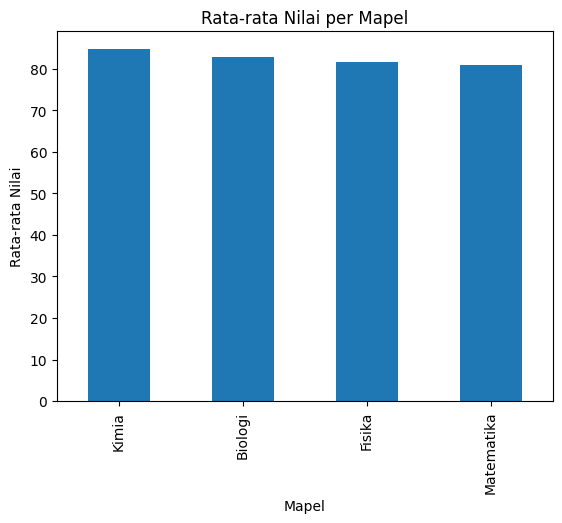

In [17]:
df.groupby("Matkul")["Nilai"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Rata-rata Nilai per Mapel")
plt.xlabel("Mapel")
plt.ylabel("Rata-rata Nilai")
plt.show()


- Kimia memiliki nilai rata-rata tertinggi dan terendah adalah matematika
- Selisih rata-rata antar mapel kecil(3-4 poin) -> performa antar mapel relatif merata dan stabil

**UTS vs UAS (Indikasi Peningkatan/Penurunan Performa):**

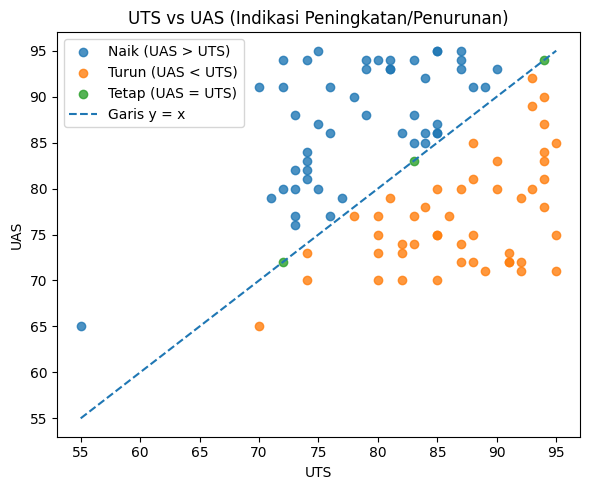

In [18]:
naik = df[df["UAS"] > df["UTS"]]
turun = df[df["UAS"] < df["UTS"]]
tetap = df[df["UAS"] == df["UTS"]]

plt.figure(figsize=(6,5))
plt.scatter(naik["UTS"], naik["UAS"], label="Naik (UAS > UTS)", alpha=0.8)
plt.scatter(turun["UTS"], turun["UAS"], label="Turun (UAS < UTS)", alpha=0.8)
plt.scatter(tetap["UTS"], tetap["UAS"], label="Tetap (UAS = UTS)", alpha=0.8)

min_v = min(df["UTS"].min(), df["UAS"].min())
max_v = max(df["UTS"].max(), df["UAS"].max())
plt.plot([min_v, max_v], [min_v, max_v], linestyle="--", label="Garis y = x")

plt.title("UTS vs UAS (Indikasi Peningkatan/Penurunan)")
plt.xlabel("UTS")
plt.ylabel("UAS")
plt.legend()
plt.tight_layout()
plt.show()


- Komposisi perubahan nilai: 49% siswa naik (UAS > UTS), 48% siswa turun (UAS < UTS), 3% Tetap.
- Perubahan performa hampir seimbang, sehingga daftar intervensi perlu fokus ke performa turun atau nilainya rendah  

**Distribusi Nilai:**

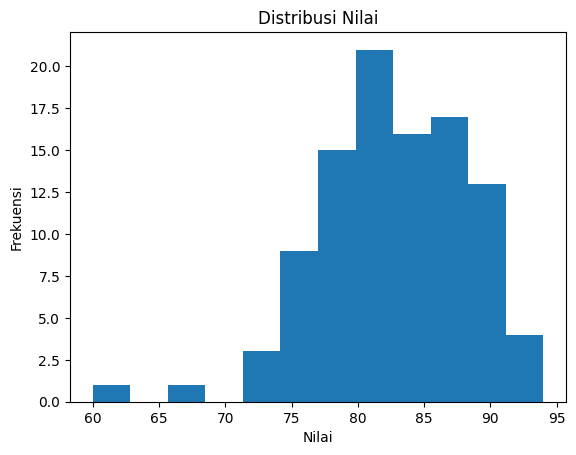

In [19]:
plt.hist(df["Nilai"], bins=12)
plt.title("Distribusi Nilai")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()


- Nilai mayoritas berada di rentang 76-89.
- Puncak distribusi paling padat sekitar 80-85(kategori 'cukup-bagus'). Nilai minimum 60, maksimum 94, rata-rata keseluruhan 82,50.


**Delta Performa per Matkul (naik/turun):**

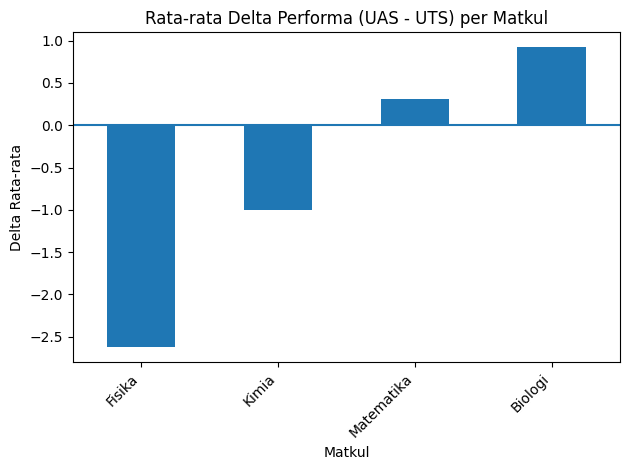

In [20]:
df.groupby("Matkul")["Delta Performa"].mean().sort_values().plot(kind="bar")
plt.title("Rata-rata Delta Performa (UAS - UTS) per Matkul")
plt.xlabel("Matkul")
plt.ylabel("Delta Rata-rata")
plt.axhline(0)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


- Matkul yang cenderung turun dari UTS ke UAS: Fisika(-2,63) dan Kimia(-1,00) indikasi bahwa UAS lebih kompleks sehingga perlu penguatan materi.
- Matkul yang cenderung naik:
Biologi (+0,92) dam Matematika (+0,31)ada perbaikan dan kenaikan

**Indikasi Tren Nilai per Mapel dari Waktu ke Waktu:**

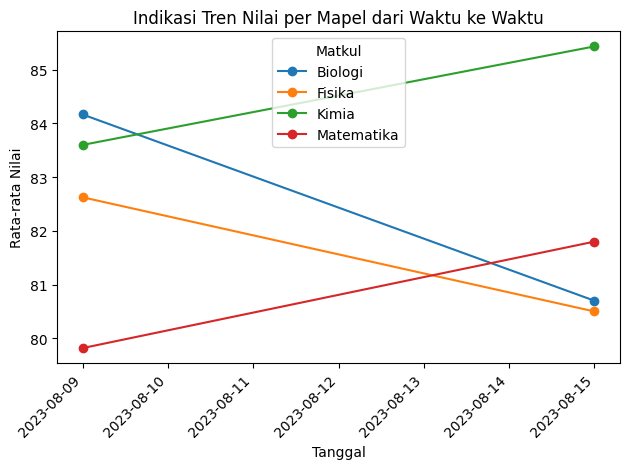

In [21]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"], errors="coerce")

trend_mapel = df.pivot_table(index="Tanggal", columns="Matkul", values="Nilai", aggfunc="mean")
trend_mapel.plot(marker="o")
plt.title("Indikasi Tren Nilai per Mapel dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Nilai")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


- Ketika tren nilai dipisahkan per mapel, terlihat pola berbeda antar Matkul, Kimia dan Matematika menunjukan peningkatat dari 9 ke 15 agustus, sedangakn Biologi dan Fisika cenderung menurun.
- Karena dataset hanya mencakup beberapa saja, hasil analisis ini merupakan indikasi awal yang dapat digunakan sebagai prioritas pemantauan dan intervensi pada Matkul yang mengalami penurunan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2